## Исследование для оператора сотовой связи. 
## Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


# 1. Откроем файлы с данными и изучим информацию.

In [1]:
import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


**Изучим отдельно каждый датасет отдельно.**

Начнем с calls. 

* id — уникальный номер звонка

* call_date — дата звонка

* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
calls.tail()

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Приведем call_date к типу даты, duration округлим в большую сторону.

In [6]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
calls['duration'] = calls['duration'].apply(math.ceil)

In [7]:
#проверим
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [8]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


C calls пока все.

Теперь изучим internet.
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
*  session_date — дата интернет-сессии
* user_id — идентификатор пользователя


In [9]:
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Также поправим формат даты. Объем потраченного за сессию пока не трогаем


In [12]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [13]:
#проверим
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


ОК.

Теперь посмотрм на сообщения.


* d — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение


In [14]:
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [15]:
messages.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Здесь также нужно поправиь дату.

In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [17]:
#проверим
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Хорошо.
Теперь изучим тарифы.

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [18]:
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [19]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Здесь меня пока ничего не смущает.

Теперь пользователи
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана






In [20]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Поправим тип в датах.

In [22]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [23]:
#проверим
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


# 2. Подготовка данных.


**Посчитайте для каждого пользователя:**

* количество сделанных звонков и израсходованных минут разговора по месяцам
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану). 




**Количество сделанных звонков и израсходованных минут разговора по месяцам**

In [24]:
#добавим столбец с названием месяца
calls['month'] = calls['call_date'].dt.month_name()

In [25]:
# проверим
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,July
1,1000_1,2018-08-17,0,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December


In [26]:
users_calls = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()

In [27]:
users_calls.head()

,user_id,month,duration
0,1000,August,408
1,1000,December,333
2,1000,July,340
3,1000,June,172
4,1000,May,159


**Количество отправленных сообщений по месяцам**

In [28]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [29]:
#добавим столбец с названием месяца
messages['month'] = messages['message_date'].dt.month_name()
messages.head() #проверим

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,June
1,1000_1,2018-10-08,1000,October
2,1000_2,2018-08-04,1000,August
3,1000_3,2018-06-16,1000,June
4,1000_4,2018-12-05,1000,December


In [30]:
users_messages = messages.groupby(['user_id', 'month']).agg({'id': 'count'})
users_messages.head()

id
user_id month       
1000    August    81
        December  70
        July      75
        June      60
        May       22

In [31]:
# переименуем id в messages
users_messages = users_messages.rename(columns={'id':'messages'})

In [32]:
users_messages.head()

messages
user_id month             
1000    August          81
        December        70
        July            75
        June            60
        May             22

**Объем израсходованного интернет-трафика по месяцам**

In [33]:
#добавим столбец с названием месяца
internet['month'] = internet['session_date'].dt.month_name()
internet.head() #проверим

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,November
1,1,1000_1,1052.81,2018-09-07,1000,September
2,2,1000_2,1197.26,2018-06-25,1000,June
3,3,1000_3,550.27,2018-08-22,1000,August
4,4,1000_4,302.56,2018-09-24,1000,September


In [34]:
users_internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
users_internet.head()

,user_id,month,mb_used
0,1000,August,14055.93
1,1000,December,9817.61
2,1000,July,14003.64
3,1000,June,23233.77
4,1000,May,2253.49


**Помесячная выручка с каждого пользователя**

In [35]:
#объединим таблицы
data = users_calls.merge(users_internet, on = ['user_id', 'month'], how = 'outer').merge(users_messages, on = ['user_id', 'month'], how = 'outer').fillna(0)
data = data.merge(users, on = 'user_id', how = 'left').merge(tariffs, left_on = 'tariff', 
                                                                 right_on = 'tariff_name', how = 'left')
                                                                

In [36]:
data.head()

,user_id,month,duration,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,August,408.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,December,333.0,9817.61,70.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,July,340.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,June,172.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,May,159.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


In [37]:
# проверим не потеряли ли мы что-нибудь
data.isna().sum()

user_id                     0
month                       0
duration                    0
mb_used                     0
messages                    0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff_name                 0
dtype: int64

In [38]:
#напишем функцию расчета ежемесячной выручки
def get_fee(data):

    minutes_over = (data['duration'] - data['minutes_included']) *  data['rub_per_minute']
    mb_over = np.ceil((data['mb_used'] - data['mb_per_month_included']) / 1024) * data['rub_per_gb']
    messages_over = (data['messages'] - data['messages_included']) * data['rub_per_message']

    if minutes_over < 0: minutes_over = 0
    if mb_over < 0: mb_over = 0
    if messages_over < 0: messages_over = 0
    
    return data['rub_monthly_fee'] + minutes_over + mb_over + messages_over

data['fee'] = data.apply(get_fee, axis = 1) # добавим столбец с выручкой

In [39]:
data.head()

,user_id,month,duration,mb_used,messages,age,churn_date,city,first_name,last_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,fee
0,1000,August,408.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,December,333.0,9817.61,70.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,July,340.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,June,172.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,May,159.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0


# 3. Анализ данных
*Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.*

Посмотрим на тарифы

In [40]:
data[data['tariff'] == 'smart']['fee'].describe()

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: fee, dtype: float64

In [41]:
data[data['tariff'] == 'ultra']['fee'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: fee, dtype: float64

Итак, у smart клиентов больше, это можно объяснить более низкой абонентской платой, по сравнению с ultra. Но и переплачивают владельцы smart значительно чаще, видимо чего-то им явно не хватает. Посмотрим чего: изучим сколько минут, сообщений и трафика тратят клиенты.

Сначала посмотрим на звонки.

В smart включено 500 минут разговора.

В ultra включено 3000 минут разговора.

In [42]:
data.groupby('tariff')\
  .agg({'duration':['median','mean','var','std']})\
  .style.format("{:.2f}")

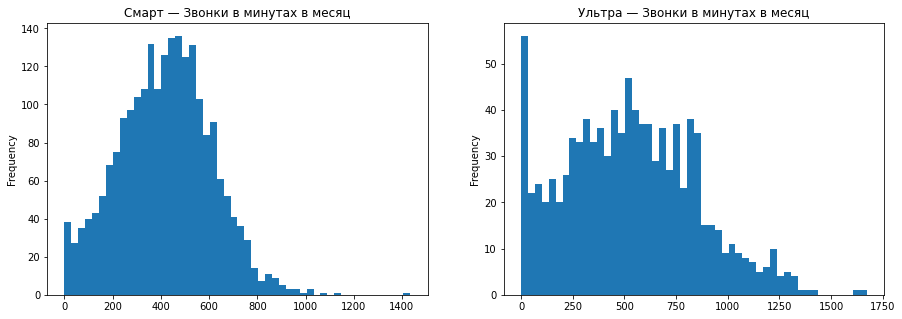

In [43]:
plt.figure(figsize = (15, 5))
data[data['tariff'] == 'smart']['duration'].plot(kind='hist', bins=50, ax = plt.subplot(1, 2, 1))
plt.title('Смарт — Звонки в минутах в месяц')
data[data['tariff'] == 'ultra']['duration'].plot(kind='hist', bins=50, ax = plt.subplot(1, 2, 2))
plt.title('Ультра — Звонки в минутах в месяц');

На Смарте клиенты проговаривают около 422 минут, и по графику видно, что многим не хватает тарифных 500 минут, и приходится переплачивать. А вот в Ультре среднем наговаривают 518 минут, таким образом в запасе остается почти 2500 минут. За звонки на Ультре не переплачивают. На Ультре есть явный пик около 0 минут, но на статискику в общем он не влият и им можно пренебречь.

Теперь посмотроим на интернет трафик.

На Смарте 15Гб трафика.

На Ультре 30 Гб трафика.

In [44]:
# добавим столбец с гигабайтами
data['gb'] = data['mb_used'] / 1024
data['gb'] = data['gb'].apply(math.ceil)
data.head()

,user_id,month,duration,mb_used,messages,age,churn_date,city,first_name,last_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,fee,gb
0,1000,August,408.0,14055.93,81.0,52,NaT,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,14
1,1000,December,333.0,9817.61,70.0,52,NaT,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,10
2,1000,July,340.0,14003.64,75.0,52,NaT,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,14
3,1000,June,172.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,23
4,1000,May,159.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,...,1000,30720,3000,1950,150,1,1,ultra,1950.0,3


In [45]:
data.groupby('tariff')\
  .agg({'gb':['median','mean','var','std']})\
  .style.format("{:.2f}")

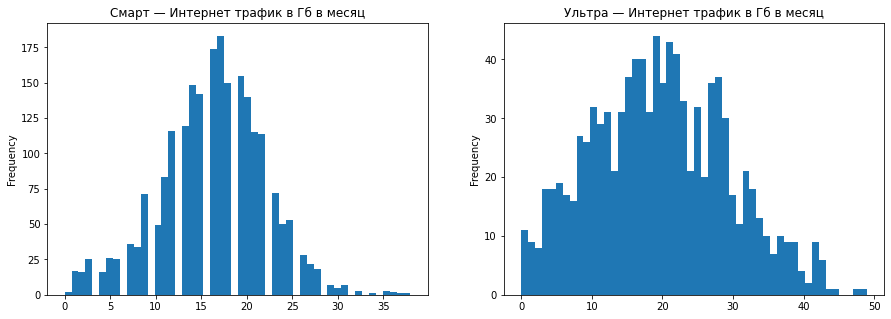

In [46]:
plt.figure(figsize = (15, 5))
data[data['tariff'] == 'smart']['gb'].plot(kind='hist', bins=50, ax = plt.subplot(1, 2, 1))
plt.title('Смарт — Интернет трафик в Гб в месяц')
data[data['tariff'] == 'ultra']['gb'].plot(kind='hist', bins=50, ax = plt.subplot(1, 2, 2))
plt.title('Ультра — Интернет трафик в Гб в месяц');

На Смарте клиенты тратят в среднем 17Гб, при условии 15Гб, включеннных в тариф. А вот на Ультре запас в 30Гб помогает большинству не переплачивать за дополнительный интернет, в среднем используют 19Гб.

Теперь посмотрим на сообщения.

На Смарте пакет из 50 смс.

На Ультре пакет из 1000 смс.

In [47]:
data.groupby('tariff')\
  .agg({'messages':['median','mean','var','std']})\
  .style.format("{:.2f}")

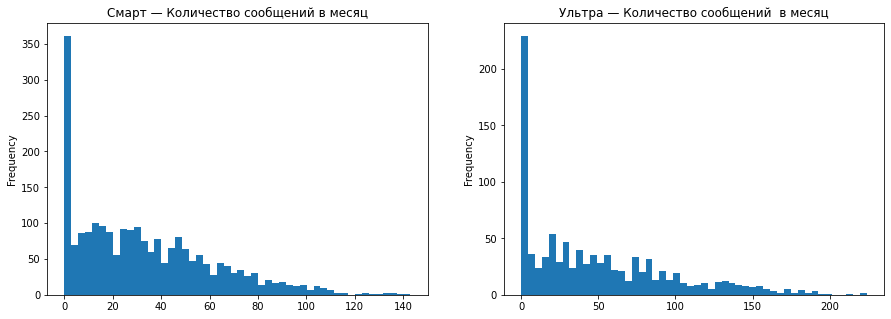

In [48]:
plt.figure(figsize = (15, 5))
data[data['tariff'] == 'smart']['messages'].plot(kind='hist', bins=50, ax = plt.subplot(1, 2, 1))
plt.title('Смарт — Количество сообщений в месяц')
data[data['tariff'] == 'ultra']['messages'].plot(kind='hist', bins=50, ax = plt.subplot(1, 2, 2))
plt.title('Ультра — Количество сообщений  в месяц');

Явные нулевые пики есть на обоих тарифах, сообщенимями почти не пользуются. На Смарте в среднем используют 28 смс, на графике видно, что есть клиенты, кому мало 50смс, включенных в пакет, они переплачивают за дополнительные. А вот на Ультре запас в 1000 смс кажется излишним, в среднем в месяц отправляют 38 смс.

# 4. Проверка гипотез

**1.средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;**

**2.средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**


**1. Сформулируем гипотезы**

* H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается

* H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

In [49]:
ultra = data.query('tariff == "ultra"')
smart = data.query('tariff == "smart"')


In [50]:
alpha = 0.05 # стандартный критический уровень статистической значимости
results = st.ttest_ind(ultra['fee'], smart['fee'], equal_var = False) # значение False, так как выборки разного размера.
print('р-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


**2. Сформулируем гипотезы**

* H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
* H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [51]:
data['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [52]:
data['region'] = np.where(data['city'] == 'Москва', 'Москва', 'Провинция')

In [53]:
moscow = data[data['region'] == 'Москва']
province = data[data['region'] == 'Провинция']

In [54]:
alpha = 0.05 # стандартный критический уровень статистической значимости
results = st.ttest_ind(moscow['fee'], province['fee'], equal_var = False) # значение False, так как выборки разного размера.
print('р-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 52% такой результат может быть получен случайно. Значимых различий нет.



# 5. Общий вывод
Пользователям тарифа Smart часто не хватает пакета минут и Гб, поэтому им часто приходится покупать дополнительные. В среднем пользователи Smarta приносят около 1300 руб (переплата 750руб по сравнению с ежемесячной платой). Клиенты могут быть недовольны такими переплатами, ведь изначально они настраивались на 550 руб.

Пользователям тарифа Ultra и минут, и Гб, и тем более смс хватает с избытком, переплаты происходят крайне редко. В среднем пользователи тарифа Ultra приносят около 2070 руб (переплата всего 120 руб по сравнению с ежемесячной платой).

Гипотеза, что выручка пользователей тарифов «Ультра» и «Смарт» не различается была отвергнута, поэтому можем делать выводы по среднему.

Ultra - тариф который приносит больше денег. Рекламный бюджет следует скорректировать в его пользу. 


